<a href="https://colab.research.google.com/github/ChawitTe/Covid19/blob/main/DADS5001_Chawit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [ ]:
# เรียกใช้ libraries ที่จำเป็นในการทำงาน
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import matplotlib as mpl # เพิ่ม font เพื่อให้สามารถสร้างกราฟเป็นภาษาไทย
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Import the dataset and assign it to a variable called df.
ข้อมูล covid19 ตั้งแต่วันที่ 26/10/2021 ถึง 11/02/2022 ทำการ clean data ด้วย open refine และ excel

ข้อมูลจาก กรมควบคุมโรค  https://data.go.th/dataset/covid-19-daily

In [ ]:
df = pd.read_csv('/content/confirmed-cases-since-271064.csv', low_memory=False, encoding='UTF-8')
df.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1859158,2021-10-26,2021-10-25,ชาย,20,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
1,1859159,2021-10-26,2021-10-25,หญิง,42,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
2,1859160,2021-10-26,2021-10-25,หญิง,33,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
3,1859161,2021-10-26,2021-10-25,หญิง,52,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร
4,1859162,2021-10-26,2021-10-25,หญิง,84,ปี,Thailand,ลำปาง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ลำปาง,เมืองลำปาง


# What is the type and shape of the columns?

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701958 entries, 0 to 701957
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   No.                    701958 non-null  int64 
 1   announce_date          701958 non-null  object
 2   Notified date          701958 non-null  object
 3   sex                    660140 non-null  object
 4   age                    635256 non-null  object
 5   Unit                   612751 non-null  object
 6   nationality            632706 non-null  object
 7   province_of_isolation  698274 non-null  object
 8   risk                   701958 non-null  object
 9   province_of_onset      634718 non-null  object
 10  district_of_onset      605269 non-null  object
dtypes: int64(1), object(10)
memory usage: 58.9+ MB
None
(701958, 11)


# Rename columns Unit and Notified date



In [ ]:
df.rename(columns={'Notified date':'notified_date'},inplace=True)
df.rename(columns={'Unit':'unit'},inplace=True)
df.head(3)

,No.,announce_date,notified_date,sex,age,unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1859158,2021-10-26,2021-10-25,ชาย,20,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
1,1859159,2021-10-26,2021-10-25,หญิง,42,ปี,Thailand,ลำปาง,อื่นๆ,ลำปาง,เมืองลำปาง
2,1859160,2021-10-26,2021-10-25,หญิง,33,ปี,Thailand,ลำปาง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,ลำปาง,ห้างฉัตร


# Convert the type of the column(announce_date, notified_date)  to datetime64

In [ ]:
df['announce_date'] = pd.to_datetime(df.announce_date)
df['notified_date'] = pd.to_datetime(df.notified_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701958 entries, 0 to 701957
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   No.                    701958 non-null  int64         
 1   announce_date          701958 non-null  datetime64[ns]
 2   notified_date          701958 non-null  datetime64[ns]
 3   sex                    660140 non-null  object        
 4   age                    635256 non-null  object        
 5   unit                   612751 non-null  object        
 6   nationality            632706 non-null  object        
 7   province_of_isolation  698274 non-null  object        
 8   risk                   701958 non-null  object        
 9   province_of_onset      634718 non-null  object        
 10  district_of_onset      605269 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 58.9+ MB


# Check missing value

In [ ]:
df.isnull().sum()

No.                          0
announce_date                0
notified_date                0
sex                      41818
age                      66702
unit                     89207
nationality              69252
province_of_isolation     3684
risk                         0
province_of_onset        67240
district_of_onset        96689
dtype: int64

# Percentage of missing values

In [ ]:
print('Percent of missing "sex" records is %.2f%%' %((df['sex'].isnull().sum()/df.shape[0])*100))
print('Percent of missing "age" records is %.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))
print('Percent of missing "unit" records is %.2f%%' %((df['unit'].isnull().sum()/df.shape[0])*100))
print('Percent of missing "nationality" records is %.2f%%' %((df['nationality'].isnull().sum()/df.shape[0])*100))
print('Percent of missing "province_of_isolation" records is %.2f%%' %((df['province_of_isolation'].isnull().sum()/df.shape[0])*100))
print('Percent of missing "province_of_onset" records is %.2f%%' %((df['province_of_onset'].isnull().sum()/df.shape[0])*100))
print('Percent of missing "district_of_onset" records is %.2f%%' %((df['district_of_onset'].isnull().sum()/df.shape[0])*100))

Percent of missing "sex" records is 5.96%
Percent of missing "age" records is 9.50%
Percent of missing "unit" records is 12.71%
Percent of missing "nationality" records is 9.87%
Percent of missing "province_of_isolation" records is 0.52%
Percent of missing "province_of_onset" records is 9.58%
Percent of missing "district_of_onset" records is 13.77%


# Final Adjustments to Data

In [ ]:
df['age'].fillna(0, inplace=True)
df['age'] = df['age'].astype(int)
df['sex'].fillna('ไม่ระบุ', inplace=True)
df['unit'].fillna('ไม่ระบุ', inplace=True)
df['nationality'].fillna('ไม่ระบุ', inplace=True)
df['province_of_isolation'].fillna('ไม่ระบุ', inplace=True)
df['risk'].fillna('ไม่ระบุ', inplace=True)
df['province_of_onset'].fillna('ไม่ระบุ', inplace=True)
df['district_of_onset'].fillna('ไม่ระบุ', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701958 entries, 0 to 701957
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   No.                    701958 non-null  int64         
 1   announce_date          701958 non-null  datetime64[ns]
 2   notified_date          701958 non-null  datetime64[ns]
 3   sex                    701958 non-null  object        
 4   age                    701958 non-null  int64         
 5   unit                   701958 non-null  object        
 6   nationality            701958 non-null  object        
 7   province_of_isolation  701958 non-null  object        
 8   risk                   701958 non-null  object        
 9   province_of_onset      701958 non-null  object        
 10  district_of_onset      701958 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 58.9+ MB


# วิเคราะห์ข้อมูล / Data Analysis

# 1.ตรวจสอบว่าผู้หญิงหรือผู้ชายที่ติด covid มากกว่ากันและมีจำนวนเท่าไหร่ / Stat

            sex
หญิง     348529
ชาย      311611
ไม่ระบุ   41818


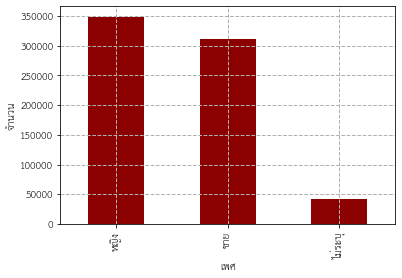

In [ ]:
a = df['sex'].value_counts().to_frame()
print(a)
a['sex'].plot.bar(color = 'darkred')
plt.grid(True, linewidth= 1, linestyle="--")
plt.xlabel('เพศ')
plt.ylabel('จำนวน')
plt.show()

#2.ผู้หญิงติดเชื้อมากกว่าผู้ชายกี่เปอร์เซ็นต์ / Stat

In [ ]:
women = df.query("sex == 'หญิง'")
count_women = women['sex'].count()
men = df.query("sex == 'ชาย'")
count_men = men['sex'].count()
print(f"ผู้หญิงมีจำนวนติดเชื้อมากกว่าผู้ชาย {(((count_women-count_men)/count_men)*100):.2f}%")

ผู้หญิงมีจำนวนติดเชื้อมากกว่าผู้ชาย 11.85%


#3.จำนวนผู้ติดเชื้อโดยแยกตามจังหวัด / Stat

In [ ]:
province_df = df.groupby('province_of_onset')['No.'].count().to_frame().sort_values(by='No.',ascending=False)
province_df

,No.
province_of_onset,
กรุงเทพมหานคร,91528
ไม่ระบุ,67240
ชลบุรี,36736
สมุทรปราการ,32168
สงขลา,24253
...,...
ระนอง,1198
อุทัยธานี,1058
อำนาจเจริญ,860


#4.การแจกแจงของอายุคนติดเชื้อโควิด(unit = ปี) / Stat

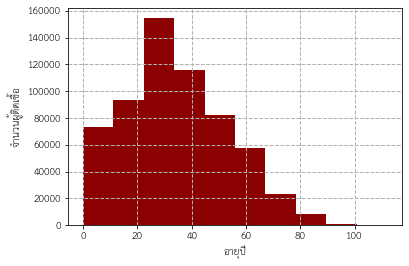

In [ ]:
year_unit = df.query("unit == 'ปี'")
year_unit['age'].hist(color='darkred')
plt.grid(True, linewidth= 1, linestyle="--")
plt.xlabel('อายุปี')
plt.ylabel('จำนวนผู้ติดเชื้อ')
plt.show()

#5.คนที่อายุน้อยที่สุดและมากที่สุดที่ติดเชื้อ / Stat

In [ ]:
day_unit = df.query("unit == 'วัน'")
youngest = day_unit['age'].min()
year_unit = df.query("unit == 'ปี'")
oldest = year_unit['age'].max()
print('คนติดเชื้อที่อายุน้อยที่สุด',youngest,'วัน')
print('คนติดเชื้อที่อายุมากที่สุด',oldest,'ปี')

คนติดเชื้อที่อายุน้อยที่สุด 1 วัน
คนติดเชื้อที่อายุมากที่สุด 112 ปี


# 6.คนติดเชื้อด้วยสาเหตุใดบ้างและจำนวนเท่าไหร่ / Insight

In [ ]:
df['risk'].value_counts().to_frame()

,risk
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,330837
อื่นๆ,221430
อยู่ระหว่างการสอบสวน,48473
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,22445
ทัณฑสถาน/เรือนจำ,16598
สถานที่ทำงาน,15616
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,14020
Phuket Sandbox,4930
บุคลากรด้านการแพทย์และสาธารณสุข,4606
Test and Go,3870


#7.จำนวนชาวต่างชาติผู้ติดเชื้อ 5 อันดับแรก / Insight

                 No.
nationality         
Burmese        14591
Cambodian       4896
Russian         2421
Laotian / Lao   1629
British         1344


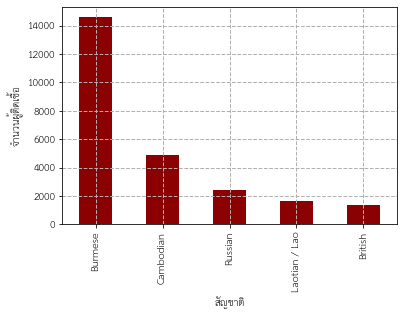

In [ ]:
total = df.groupby('nationality')['No.'].count().to_frame().sort_values(by='No.',ascending=False)
s = total.query("nationality != 'Thailand' & nationality != 'ไม่ระบุ'")
print(s.head(5))
s['No.'].head().plot.bar(color="darkred")
plt.grid(True, linewidth= 1, linestyle="--")
# พม่า, กัมพูชา, รัสเซีย, ลาว, อังกฤษ
plt.xlabel('สัญชาติ')
plt.ylabel('จำนวนผู้ติดเชื้อ')
plt.show()

#8.กรุงเทพมหานครมีจำนวนผู้ติดเชื้อเท่าไหร่โดยแยกตามเพศ / Insight

            No.
sex            
ชาย      311611
หญิง     348529
ไม่ระบุ   41818


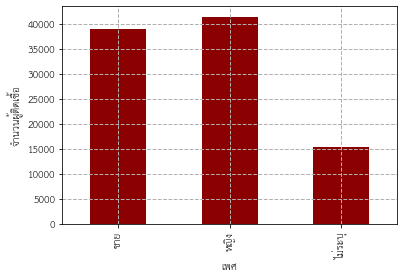

In [ ]:
# mydf = df[df.province_of_isolation == 'กรุงเทพมหานคร']
totalsex = df.groupby('sex').count()
b = totalsex['No.'].to_frame()
print(b)
mydf = df.query('province_of_isolation == "กรุงเทพมหานคร"')
mydf.groupby('sex').count()['province_of_isolation'].plot.bar(color='darkred')
plt.ylabel('จำนวนผู้ติดเชื้อ')
plt.xlabel('เพศ')
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

#9. แนวโน้มการติดเชื้อ / Insight

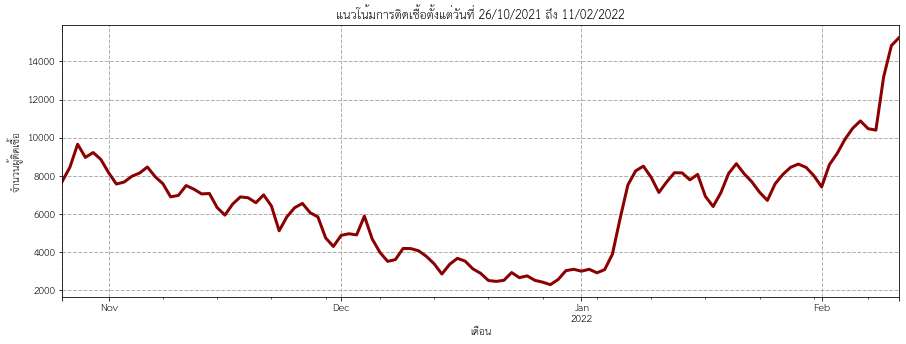

In [ ]:
a = df.groupby('announce_date').count().sort_values(by='announce_date')
a['No.'].plot.line(figsize=(15, 5), linewidth = 3, color = 'darkred')
plt.grid(True, linewidth= 1, linestyle="--")
plt.title('แนวโน้มการติดเชื้อตั้งแต่วันที่ 26/10/2021 ถึง 11/02/2022')
plt.xlabel('เดือน')
plt.ylabel('จำนวนผู้ติดเชื้อ')
plt.show()